In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
zip_path = '/content/drive/MyDrive/final_dataset.zip'
extract_path = '/content/final_dataset'

!unzip -q "$zip_path" -d "$extract_path"

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import os

# Paths to your dataset folders
train_dir = "/content/final_dataset/train"
val_dir = "/content/final_dataset/val"
test_dir = "/content/final_dataset/test"

# Parameters
img_size = (224,224)
batch_size = 32
num_classes = 41  # change if needed

# Load datasets using tf.data
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical",
    shuffle=True
)
class_names = train_ds.class_names

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical",
    shuffle=True
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical",
    shuffle=False
)

# Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

# Data augmentation layer
data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomBrightness(factor=0.1)
])



Found 28700 files belonging to 41 classes.
Found 8200 files belonging to 41 classes.
Found 4100 files belonging to 41 classes.


In [ ]:
print(class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Cotton___Bacterial_blight', 'Cotton___Curl_virus', 'Cotton___Fusarium_wilt', 'Cotton___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Rice___Bacterial_leaf_blight', 'Rice___Brown_spot', 'Rice___Leaf_blast', 'Rice___Leaf_scald', 'Rice___Sheath_blight', 'Rice___healthy', 'Sugarcane___Mosaic', 'Sugarcane___Red_rot', 'Sugarcane___Rust', 'Sugarcane___Yellow', 'Sugarcane___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites_Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yel

In [ ]:

class_indices = {i: name for i, name in enumerate(class_names)}
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Corn_(maize)___Common_rust_',
 5: 'Corn_(maize)___Northern_Leaf_Blight',
 6: 'Corn_(maize)___healthy',
 7: 'Cotton___Bacterial_blight',
 8: 'Cotton___Curl_virus',
 9: 'Cotton___Fusarium_wilt',
 10: 'Cotton___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Pepper,_bell___Bacterial_spot',
 16: 'Pepper,_bell___healthy',
 17: 'Potato___Early_blight',
 18: 'Potato___Late_blight',
 19: 'Potato___healthy',
 20: 'Rice___Bacterial_leaf_blight',
 21: 'Rice___Brown_spot',
 22: 'Rice___Leaf_blast',
 23: 'Rice___Leaf_scald',
 24: 'Rice___Sheath_blight',
 25: 'Rice___healthy',
 26: 'Sugarcane___Mosaic',
 27: 'Sugarcane___Red_rot',
 28: 'Sugarcane___Rust',
 29: 'Sugarcane___Yellow',
 30: 'Sugarcane___healthy',
 31: 'Tomato___Bacterial_spot',
 32: 'Tomato___Early_blight',
 33: 'Tomato___L

In [ ]:

import json
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
# Build the CNN model (5 blocks, global pooling)
model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    data_augmentation,
    layers.Rescaling(1./255),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(2),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(2),

    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.Conv2D(256, 3, activation='relu'),
    layers.MaxPooling2D(2),

    layers.Conv2D(512, 3, padding='same', activation='relu'),
    layers.Conv2D(512, 3, activation='relu'),
    layers.MaxPooling2D(2),

    layers.Dropout(0.25),

    layers.GlobalAveragePooling2D(),

    layers.Dense(1500, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(num_classes, activation='softmax')
])


In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:


model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 222, 222, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 111, 111, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 54, 54, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 10, 10, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │       769,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 41)             │        61,541 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,543,265 (21.15 MB)

 Trainable params: 5,543,265 (21.15 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Callbacks
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.3, patience=3, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "best_model.keras", monitor='val_loss', save_best_only=True)

In [ ]:
# Train
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stop, reduce_lr, checkpoint]
)

Epoch 1/20


KeyboardInterrupt: 

In [ ]:

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.4f}")


In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save("5blockcnn.keras")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_true, axis=1)

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))


In [ ]:
import matplotlib.pyplot as plt

for images, labels in test_ds.take(1):
    preds = model.predict(images)
    pred_classes = np.argmax(preds, axis=1)
    true_classes = np.argmax(labels.numpy(), axis=1)

    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Pred: {pred_classes[i]}, True: {true_classes[i]}")
        plt.axis("off")
    plt.show()


In [ ]:
# Train for 10 more epochs (adjust as needed)
history_finetune = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,         # continue up to epoch 30
    initial_epoch=20,  # continue from epoch 20
    callbacks=[early_stop, reduce_lr, checkpoint]
)


In [ ]:

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.4f}")


In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy and loss
acc = history_finetune.history['accuracy']
val_acc = history_finetune.history['val_accuracy']
loss = history_finetune.history['loss']
val_loss = history_finetune.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save("5BlockscnnBest.keras")

In [ ]:

model_path = "/content/5BlockscnnBest.keras"  # Update if needed
model = tf.keras.models.load_model(model_path)

test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.4f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9640 - loss: 0.1352
Test Accuracy: 0.9444


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Ensure y_true and y_pred are both in class label format
# If either is one-hot encoded (multilabel-indicator), convert it using argmax
if len(y_true.shape) > 1 and y_true.shape[1] > 1:
    y_true = np.argmax(y_true, axis=1)

if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
    y_pred = np.argmax(y_pred, axis=1)

# Step 2: Print classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred))

# Step 3: Confusion Matrix
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_true, y_pred))



Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       100
           1       0.99      0.99      0.99       100
           2       1.00      0.97      0.98       100
           3       0.94      0.92      0.93       100
           4       1.00      0.96      0.98       100
           5       0.97      0.97      0.97       100
           6       0.98      1.00      0.99       100
           7       0.97      1.00      0.99       100
           8       0.95      0.98      0.97       100
           9       0.94      1.00      0.97       100
          10       1.00      0.98      0.99       100
          11       0.98      0.95      0.96       100
          12       0.99      0.98      0.98       100
          13       0.99      1.00      1.00       100
          14       0.99      0.98      0.98       100
          15       0.99      0.95      0.97       100
          16       0.99      0.95      0.97       100
  

NameError: name 'tf' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import os

# Dataset paths and config
dataset_path = "/content/final_dataset"
img_size = (224, 224)
batch_size = 32
num_epochs_warmup = 5
num_epochs_finetune = 20
seed = 42

# Load datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(dataset_path, "train"),
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical",
    seed=seed
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(dataset_path, "val"),
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical",
    seed=seed
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(dataset_path, "test"),
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical",
    seed=seed
)

# Number of classes
num_classes = len(train_ds.class_names)

# Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)
test_ds = test_ds.prefetch(AUTOTUNE)



# Build model
base_model = EfficientNetB0(include_top=False, input_shape=(224, 224, 3), weights="imagenet")
base_model.trainable = False  # Will unfreeze later

inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile for warm-up
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1)
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', save_best_only=True)
callbacks = [early_stop, reduce_lr, checkpoint]

# Train - Warm-up phase (frozen base)
history1 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=num_epochs_warmup,
    callbacks=callbacks
)

# Unfreeze base model for fine-tuning
base_model.trainable = True

# Recompile with lower LR for fine-tuning
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

# Train - Fine-tuning phase
history2 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=num_epochs_finetune,
    callbacks=callbacks
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_ds)
print(f"\n✅ Final Test Accuracy: {test_acc:.4f} | Test Loss: {test_loss:.4f}")


Found 28700 files belonging to 41 classes.
Found 8200 files belonging to 41 classes.
Found 4100 files belonging to 41 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5
897/897 ━━━━━━━━━━━━━━━━━━━━ 129s 115ms/step - accuracy: 0.5762 - loss: 2.1886 - val_accuracy: 0.8860 - val_loss: 1.1173 - learning_rate: 0.0010
Epoch 2/5
897/897 ━━━━━━━━━━━━━━━━━━━━ 74s 82ms/step - accuracy: 0.7883 - loss: 1.3704 - val_accuracy: 0.8984 - val_loss: 1.0550 - learning_rate: 0.0010
Epoch 3/5
897/897 ━━━━━━━━━━━━━━━━━━━━ 78s 87ms/step - accuracy: 0.8247 - loss: 1.2666 - val_accuracy: 0.9090 - val_loss: 1.0253 - learning_rate: 0.0010
Epoch 4/5
897/897 ━━━━━━━━━━━━━━━━━━━━ 73s 81ms/step - accuracy: 0.8437 - loss: 1.2242 - val_accuracy: 0.9085 - val_loss: 1.0173 - learning_rate: 0.0010
Epoch 5/5
897/897 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.8501 - loss: 1.2116 - val_accuracy: 0.9207 - val_loss: 0.9891 - learning_rate: 0.0010
Epoch 1/20
897/897 ━━━━━━━━━━━━━━━━━━━━ 274s 220ms/step

In [ ]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_ds)
print(f"\n✅ Final Test Accuracy: {test_acc:.4f} | Test Loss: {test_loss:.4f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.9921 - loss: 0.7112

✅ Final Test Accuracy: 0.9922 | Test Loss: 0.7110


In [ ]:
model.save('/content/drive/MyDrive/efficientnetmodel.keras')

In [ ]:
import json

# Combine history from both training phases
combined_history = {
    'accuracy': history1.history['accuracy'] + history2.history['accuracy'],
    'val_accuracy': history1.history['val_accuracy'] + history2.history['val_accuracy'],
    'loss': history1.history['loss'] + history2.history['loss'],
    'val_loss': history1.history['val_loss'] + history2.history['val_loss']
}

# Save the combined history to a JSON file
with open('training_history.json', 'w') as f:
    json.dump(combined_history, f)

print("Training history saved to training_history.json")

Training history saved to training_history.json


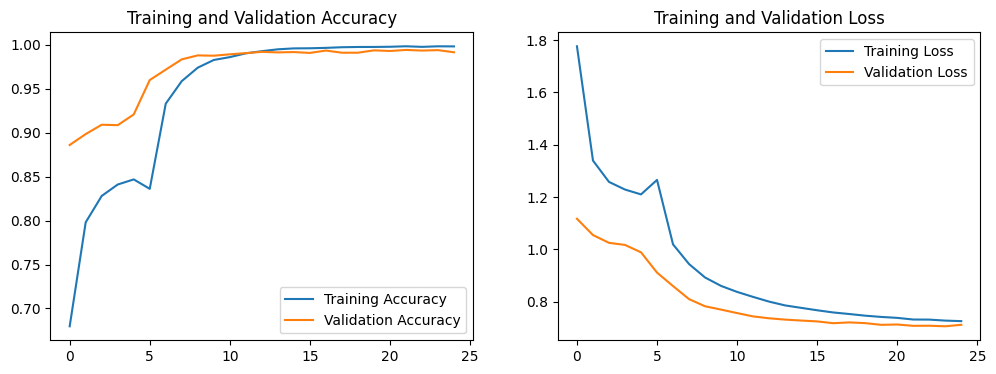

In [ ]:
import matplotlib.pyplot as plt
import json

# Load the combined history from the JSON file
with open('training_history.json', 'r') as f:
    combined_history = json.load(f)

acc = combined_history['accuracy']
val_acc = combined_history['val_accuracy']
loss = combined_history['loss']
val_loss = combined_history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Get true labels from the dataset
y_true = []
y_pred = []

for images, labels in test_ds:
    # True labels
    y_true.extend(np.argmax(labels.numpy(), axis=1))  # if one-hot encoded
    # y_true.extend(labels.numpy())  # if sparse integer labels

    # Predictions
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))

# Convert to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)



# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)


                                               precision    recall  f1-score   support

                           Apple___Apple_scab       1.00      1.00      1.00       100
                            Apple___Black_rot       1.00      1.00      1.00       100
                     Apple___Cedar_apple_rust       1.00      1.00      1.00       100
                              Apple___healthy       1.00      0.99      0.99       100
                  Corn_(maize)___Common_rust_       1.00      1.00      1.00       100
          Corn_(maize)___Northern_Leaf_Blight       1.00      1.00      1.00       100
                       Corn_(maize)___healthy       1.00      1.00      1.00       100
                    Cotton___Bacterial_blight       1.00      1.00      1.00       100
                          Cotton___Curl_virus       1.00      1.00      1.00       100
                       Cotton___Fusarium_wilt       1.00      1.00      1.00       100
                             Cotton___heal

Classification Report:

                                               precision    recall  f1-score   support

                           Apple___Apple_scab       1.00      1.00      1.00       100
                            Apple___Black_rot       1.00      1.00      1.00       100
                     Apple___Cedar_apple_rust       1.00      1.00      1.00       100
                              Apple___healthy       1.00      0.99      0.99       100
                  Corn_(maize)___Common_rust_       1.00      1.00      1.00       100
          Corn_(maize)___Northern_Leaf_Blight       1.00      1.00      1.00       100
                       Corn_(maize)___healthy       1.00      1.00      1.00       100
                    Cotton___Bacterial_blight       1.00      1.00      1.00       100
                          Cotton___Curl_virus       1.00      1.00      1.00       100
                       Cotton___Fusarium_wilt       1.00      1.00      1.00       100
                  

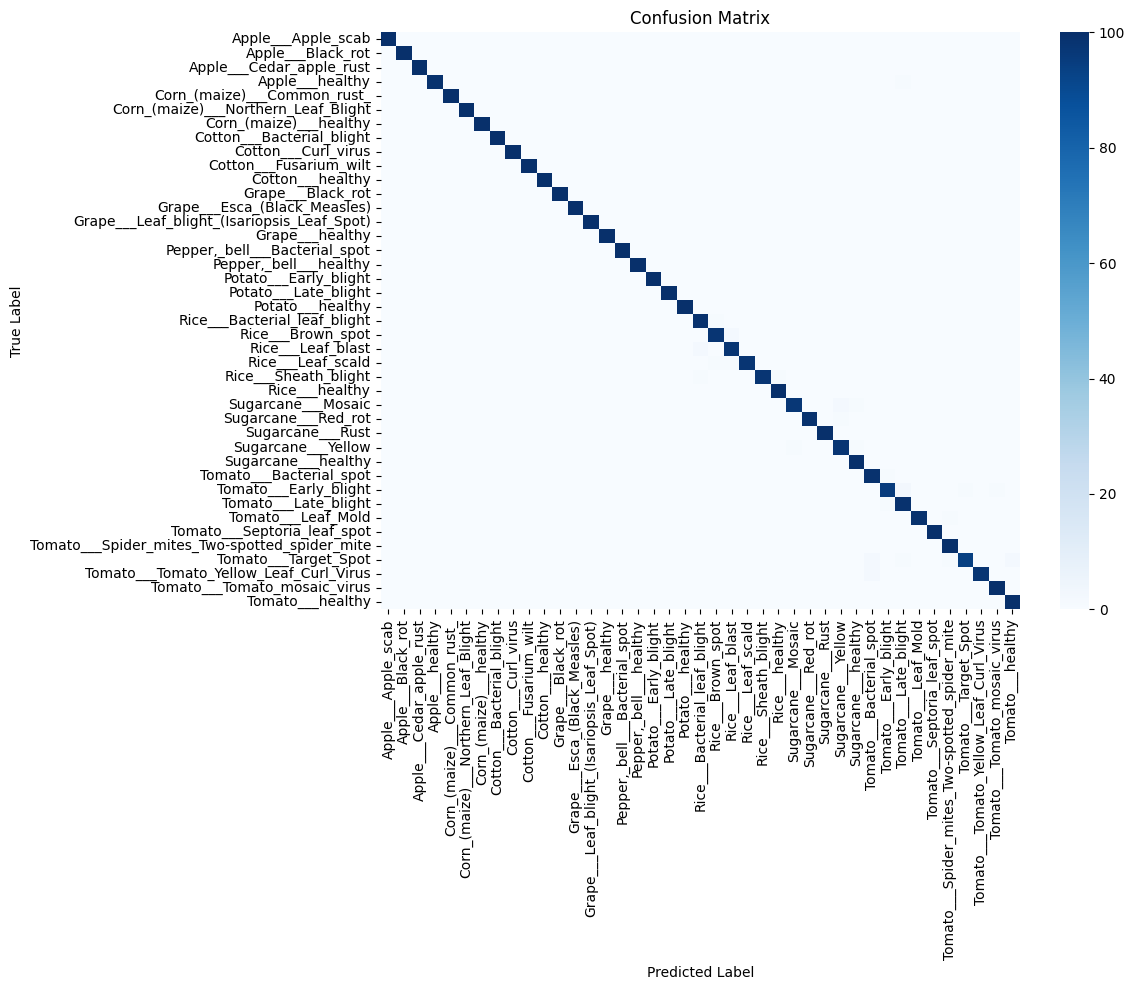

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Get class names


# Collect true and predicted labels
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    if len(labels.shape) > 1:  # One-hot encoded
        y_true.extend(np.argmax(labels.numpy(), axis=1))
    else:
        y_true.extend(labels.numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import os

# Build model
base_model = EfficientNetB0(include_top=False, input_shape=(224, 224, 3), weights="imagenet")
base_model.trainable = False  # Will unfreeze later

inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(41, activation='softmax')(x)

model_e = Model(inputs, outputs)


In [ ]:
# Compile for warm-up
model_e.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

In [ ]:
model_e.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 41)             │        21,033 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,731,596 (18.05 MB)

 Trainable params: 679,465 (2.59 MB)

 Non-trainable params: 4,052,131 (15.46 MB)